# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [4]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

In [5]:
df = pd.read_csv("athletes.csv")

In [6]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [7]:
# Sua análise começa aqui.
df.head()
amostra = get_sample(df,'height',n=3000)


In [8]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [9]:
def q1():
    # Retorne aqui o resultado da questão 1.
    amostra = get_sample(df, 'height', n=3000)
    test_shapiro = sct.shapiro(amostra)[1]
    return bool (test_shapiro > 0.05)

In [10]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

/Users/lauradamacenodealmeida/codenation/data-science-2/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lauradamacenodealmeida/codenation/data-science-2/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/lauradamacenodealmeida/codenation/data-science-2/venv/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/lauradamacenodealmeida/codenation/data-science-2/venv/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


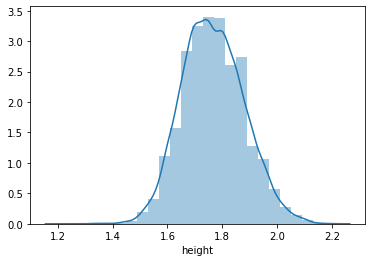

In [11]:
sns.distplot(df.height,bins=25)

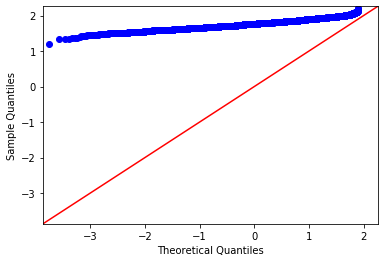

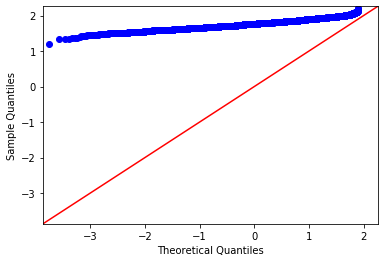

In [12]:
sm.qqplot(df.height,line="45")


## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
def q2():
    test_bera = sct.jarque_bera(amostra)[1]
    return bool (test_bera > 0.05)
    # Retorne aqui o resultado da questão 2.

In [14]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [15]:
def q3():
    amostra = get_sample(df, 'weight', n=3000)
    test_pearson = sct.normaltest(amostra)[1]
    return bool (test_pearson > 0.05)

    # Retorne aqui o resultado da questão 3.


In [16]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

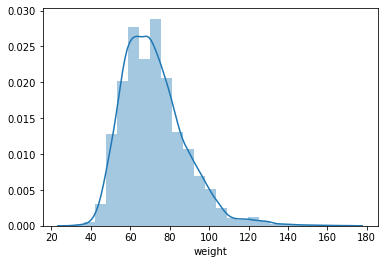

In [17]:
sns.distplot(df.weight,bins=25)

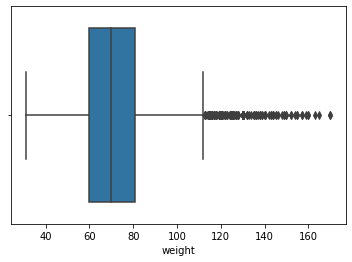

In [18]:
sns.boxplot(df.weight)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [19]:
amostra_peso = get_sample(df, 'weight', n=3000)
log = np.log(amostra_peso)


In [20]:
def q4():
    log_test = sct.normaltest(log)[1]
    
    return bool(log_test > 0.05)
    # Retorne aqui o resultado da questão 4.


In [21]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

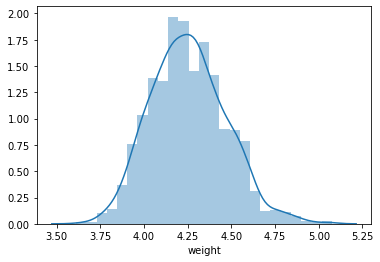

In [22]:
sns.distplot(log,bins=25)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [23]:
df_atletas = df[(df['nationality']== 'BRA')| (df['nationality']== 'USA')| (df['nationality']== 'CAN')]
df_atletas.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0


In [24]:
df_atletas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 2 to 11457
Data columns (total 11 columns):
id             1373 non-null int64
name           1373 non-null object
nationality    1373 non-null object
sex            1373 non-null object
dob            1373 non-null object
height         1356 non-null float64
weight         1335 non-null float64
sport          1373 non-null object
gold           1373 non-null int64
silver         1373 non-null int64
bronze         1373 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 128.7+ KB


In [25]:
def q5():
    ttest_atletas = sct.ttest_ind(df_atletas[df_atletas['nationality']=='BRA']['height'],df_atletas[df_atletas['nationality']=='USA']['height'],equal_var=False,nan_policy="omit")
    return bool(ttest_atletas[1]>0.05)
    
    # Retorne aqui o resultado da questão 5.


In [26]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [27]:
def q6():
    ttest_atletas = sct.ttest_ind(df_atletas[df_atletas['nationality']=='BRA']['height'],df_atletas[df_atletas['nationality']=='CAN']['height'],equal_var=False,nan_policy="omit")
    return bool(ttest_atletas[1]>0.05)
    # Retorne aqui o resultado da questão 6.

In [28]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [29]:
def q7():
    ttest_atletas = sct.ttest_ind(df_atletas[df_atletas['nationality']=='USA']['height'],df_atletas[df_atletas['nationality']=='CAN']['height'],equal_var=False,nan_policy="omit")
    return float(round(ttest_atletas[1],8))
    # Retorne aqui o resultado da questão 7.


In [32]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?